In [1]:
import numpy as np
import mplhep as hep
import matplotlib.pyplot as plt
import uproot as up
import pandas as pd 
import awkward as ak
import os, sys
import yaml
from sklearn.model_selection import train_test_split

os.environ["HOMELUDO"]="/home/submit/mori25/"
os.environ["DPUSER"]="/work/submit/mori25/Darkphotons_ludo/offline_analysis/"

        mass      effs
0    2.01000  0.422850
1    2.02005  0.423066
2    2.03015  0.427952
3    2.04030  0.432157
4    2.05050  0.430872
..       ...       ...
273  7.84388  0.556268
274  7.88310  0.549252
275  7.92251  0.541407
276  7.96213  0.532400
277  8.00194  0.513666

[278 rows x 2 columns]


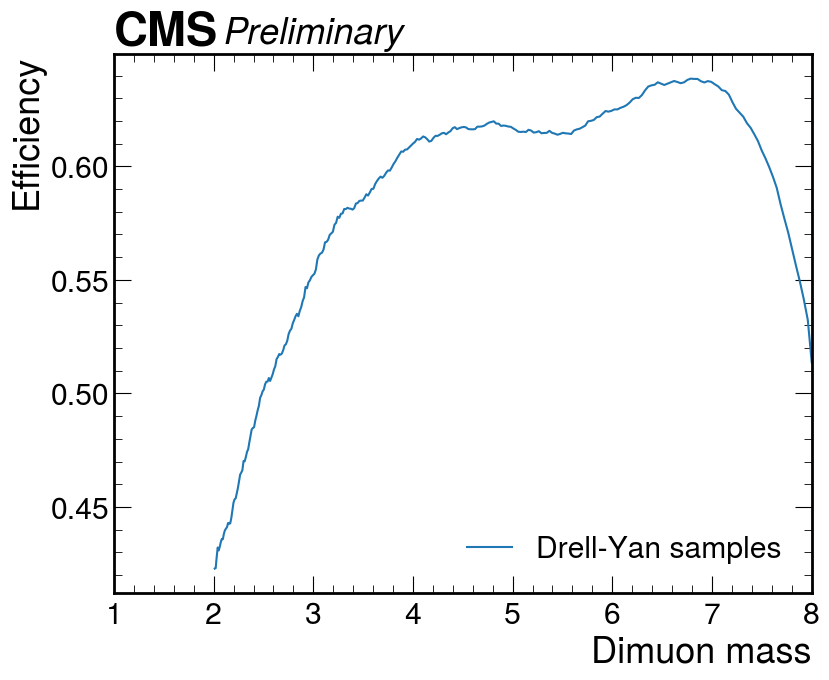

In [2]:
#write code extracting tuples from a csv file and plotting them in a nice cms plot
hep.style.use("CMS")
c = ["orange","red","blue","green"]
fig, ax = plt.subplots(figsize=(9,7))
hep.cms.text("Preliminary")

#open a csv file   
df = pd.read_csv("/work/submit/mori25/Darkphotons_ludo/offline_analysis/limits/efficiencies.csv")
print(df)

# #extract the columns
cut = df['mass']>2
masses = df['mass'][cut]
effs = df['effs'][cut]

# plt.scatter( [mass_Jpsi, mass_Y], [SF_Jpsi, SF_Y], label='Measured SF: Jpsi and Y',color='orange')

plt.plot(masses, effs,label='Drell-Yan samples')
ax.set_xlim(1, 8)
plt.xlabel('Dimuon mass')
plt.ylabel('Efficiency')
# plt.grid(True)
# plt.yscale('log')
plt.legend()
plt.show()

In [3]:
d = up.concatenate("/data/submit/mori25/dark_photons_ludo/DimuonTrees/MC_lmDY/dump_post_BDT/DimuonTree*.root:tree", ["Mm_mass","HLT_DoubleMu4_3_LowMass", "forest_prompt_Jpsi_mva","Muon_softMva1","Muon_softMva2"],library='pd')
d = d[d["Mm_mass"] > 0]


In [4]:
def compute_eff(m,mva_wp,id_wp,m_window = 0.1, var_window=False,den_ID_tr = False):
    if var_window:
        d_mass = d[(d["Mm_mass"]>m-m_window*m)&(d["Mm_mass"]<m+m_window*m)]
    else: 
        d_mass = d[(d["Mm_mass"]>m-m_window)&(d["Mm_mass"]<m+m_window)]
    if den_ID_tr:
        den = np.sum((d_mass["HLT_DoubleMu4_3_LowMass"]==1)&(d_mass["Muon_softMva1"]>id_wp)&(d_mass["Muon_softMva2"]>id_wp))
    else:
        den = len(d_mass)
    num = np.sum((d_mass["HLT_DoubleMu4_3_LowMass"]==1)&(d_mass["forest_prompt_Jpsi_mva"]>mva_wp)&(d_mass["Muon_softMva1"]>id_wp)&(d_mass["Muon_softMva2"]>id_wp))
    return num/den, den
compute_eff(3.1,0.8,0.4)

(0.6702673213311511, 9165)

In [5]:
mass = np.linspace(2,8,10)
np.vectorize(lambda m : compute_eff(m,0.8,0.4,m_window=0.1)[0])(mass)

array([0.56574761, 0.64518439, 0.68313316, 0.68865199, 0.68333005,
       0.67023844, 0.68550532, 0.70684761, 0.68918461, 0.60130485])

In [6]:
print(len(d))

650719


In [7]:
def plot_acc(window=0.1,n=100,plot_total_N=False,var_window=False):
    c = ["orange","red","blue","green"]
    fig, ax = plt.subplots(figsize=(12,9))
    hep.cms.text("Preliminary")

    mass = np.linspace(2,8,n)
    ax.plot(mass, np.vectorize(lambda m : compute_eff(m,0.8,0.4,m_window=window, var_window=var_window)[plot_total_N])(mass),label='Trigger,ID,MVA')
    ax.plot(mass, np.vectorize(lambda m : compute_eff(m,-1,0.4,m_window=window, var_window=var_window)[plot_total_N])(mass),label='Trigger,ID')
    ax.plot(mass, np.vectorize(lambda m : compute_eff(m,-1,-2,m_window=window, var_window=var_window)[plot_total_N])(mass),label='Trigger')
    ax.set_xlim(1, 8)
    ax.set_xlabel('Dimuon mass')
    if plot_total_N : ax.set_ylabel(f"N in mass window +/- {window}") 
    else: ax.set_ylabel('Efficiency')
    # plt.grid(True)
    # plt.yscale('log')
    if not plot_total_N: 
        ax.set_ylim(0.4,1)
        ax.text(1.2, 0.7, f"Mass window = +/- {window}", fontsize=12)
    plt.legend()
    plt.show()

def plot_mva(window=0.1,n=100,plot_total_N=False,var_window=False):
    c = ["orange","red","blue","green"]
    fig, ax = plt.subplots(figsize=(12,9))
    hep.cms.label("Preliminary",data=True,lumi=62.4,com=13.6)

    mass = np.linspace(2,8,n)
    ax.plot(mass, np.vectorize(lambda m : compute_eff(m,0.8,0.4,m_window=window, var_window=var_window,den_ID_tr=True)[plot_total_N])(mass),label='MVA|Trigger,ID')
    ax.set_xlim(1, 8)
    ax.set_xlabel('Dimuon mass')
    if plot_total_N : ax.set_ylabel(f"N in mass window +/- {window}") 
    else: ax.set_ylabel('Efficiency')
    # ax.grid(True)
    # plt.yscale('log')
    if not plot_total_N: 
        ax.set_ylim(0.4,1)
        ax.text(1.2, 0.7, f"Mass window = +/- {window}", fontsize=12)
    plt.legend()
    plt.show()


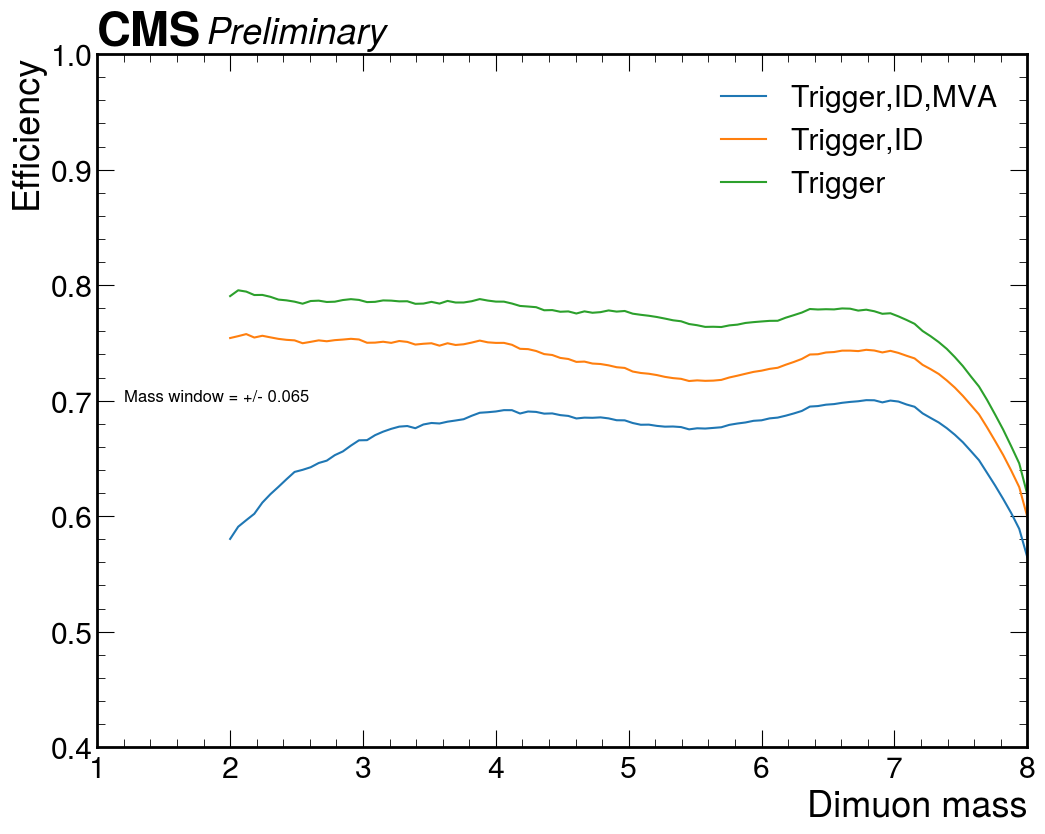

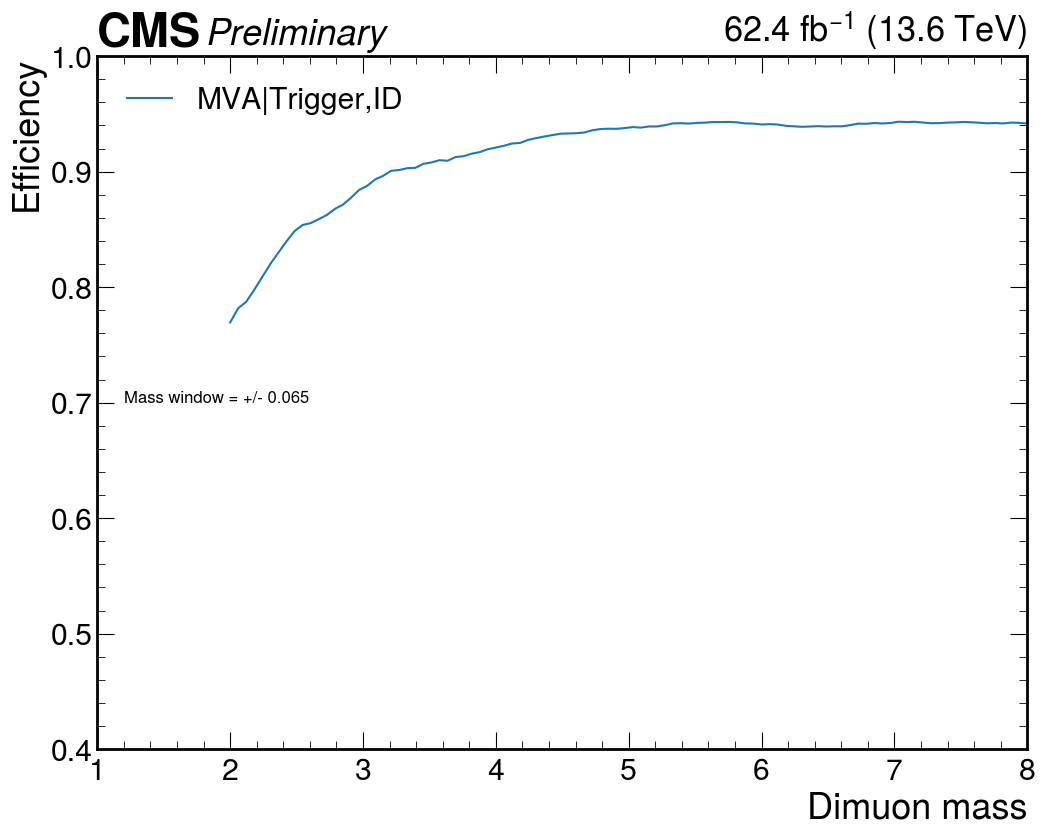

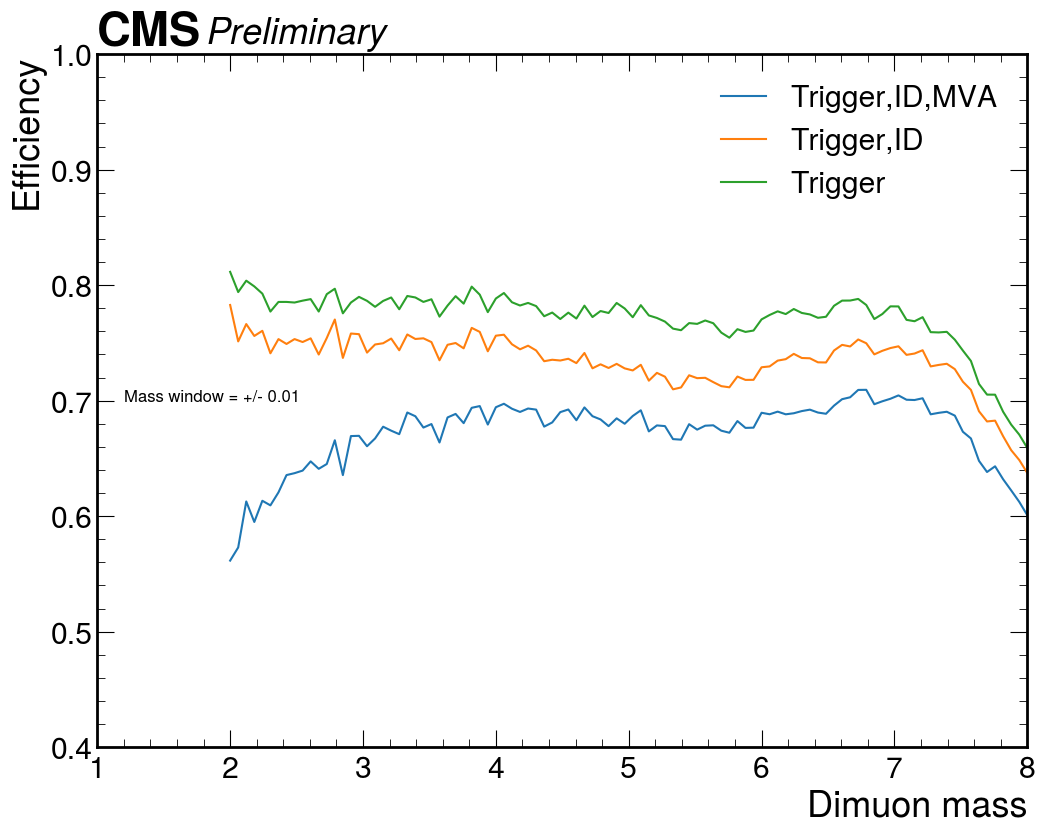

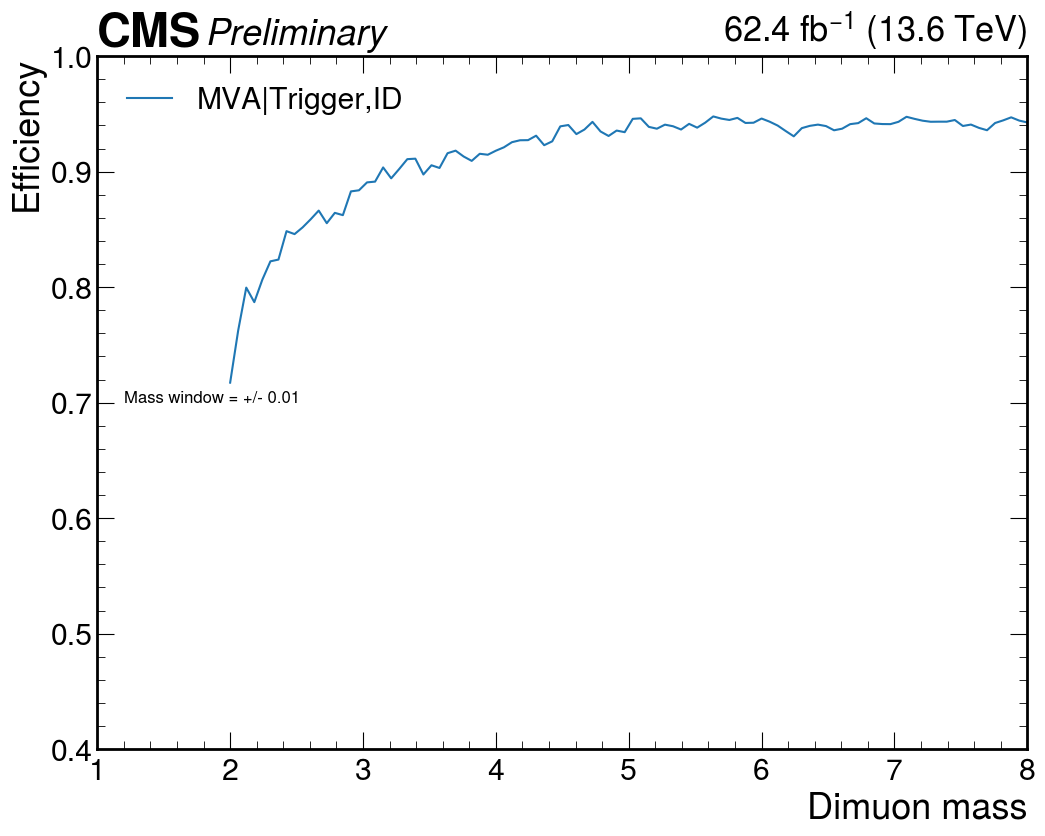

In [8]:
# windows = [0.05,0.1,0.5] 
windows = [5*0.013,0.01,0.2]
for w in windows[:2]:
    plot_acc(window=w,var_window=True
             )
    
    # plot_acc(window=w,plot_total_N=True,var_window=False
    #          )
    plot_mva(window=w,var_window=True)